In [1]:
# Install Sklearn
!pip install -U scikit-learn


In [2]:
# Load required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [3]:
# Load the wine dataset from sklearn
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df['target'] = data.target  # Add target column for visualization

In [4]:
# Data Description
print(wine_df.info())  # Structure
print(wine_df.shape[0])  # Number of rows
print(wine_df.shape[1])  # Number of columns
print(wine_df.columns)  # Names of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
# Target (class) distribution
print(wine_df['target'].value_counts())

target
1    71
0    59
2    48
Name: count, dtype: int64


In [6]:
# Summary statistics of 'alcohol' content
print(wine_df['alcohol'].describe())

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64


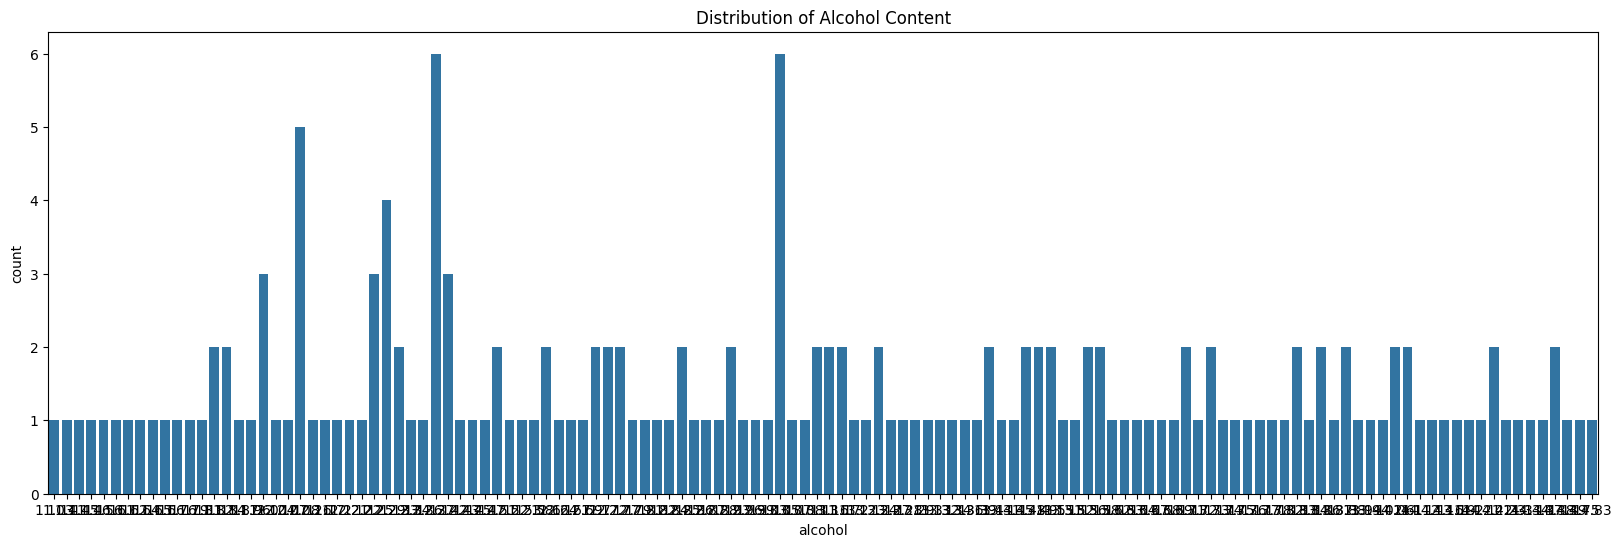

In [7]:
# Quick bar plot of alcohol content
plt.figure(figsize=(20, 6))
sns.countplot(x='alcohol', data=wine_df)
plt.title('Distribution of Alcohol Content')
plt.show()

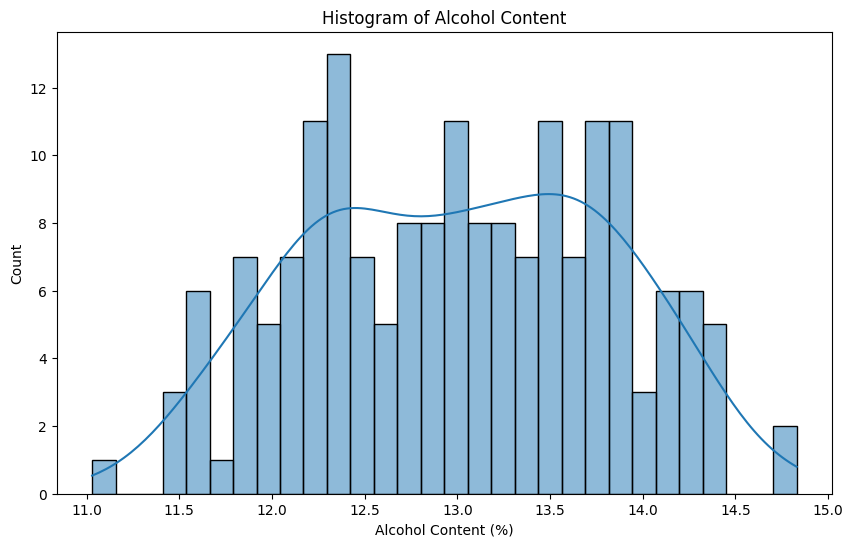

In [8]:
# Histogram of 'alcohol' content
plt.figure(figsize=(10, 6))
sns.histplot(wine_df['alcohol'], bins=30, kde=True) 
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol Content (%)')
plt.show()

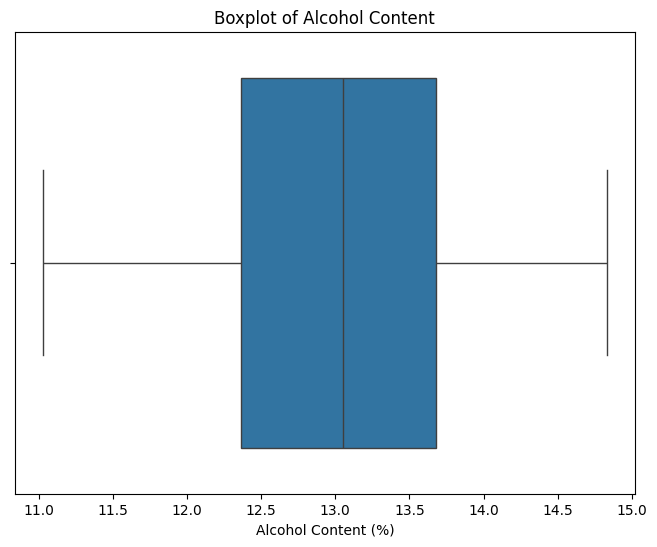

In [9]:
# Boxplot of 'alcohol' content
plt.figure(figsize=(8, 6))
sns.boxplot(x=wine_df['alcohol'])
plt.title('Boxplot of Alcohol Content')
plt.xlabel('Alcohol Content (%)')
plt.show()

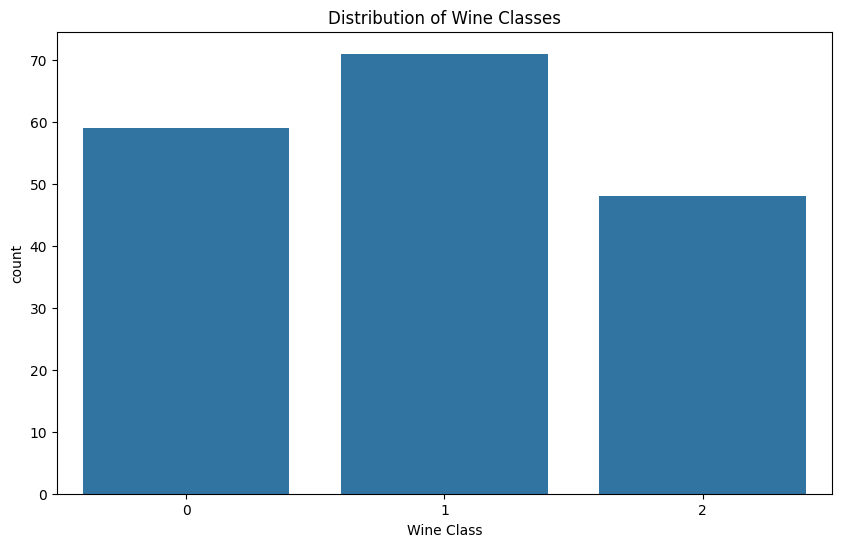

In [10]:
# Bar plot of 'target' (class)
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=wine_df)
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.show()

In [17]:

# Create a two-way table
pd.crosstab(wine_df['alcohol'], wine_df['target'])


target,0,1,2
alcohol,,,
11.03,0,1,0
11.41,0,1,0
11.45,0,1,0
11.46,0,1,0
11.56,0,1,0
...,...,...,...
14.37,1,0,0
14.38,2,0,0
14.39,1,0,0


In [18]:
# save the two-way table to an output file

# Generate the two-way table
two_way_table = pd.crosstab(wine_df['alcohol'], wine_df['target'])

# Define the output file path
output_file_path = "two_way_table.csv"

# Write the two-way table to the output file
two_way_table.to_csv(output_file_path)


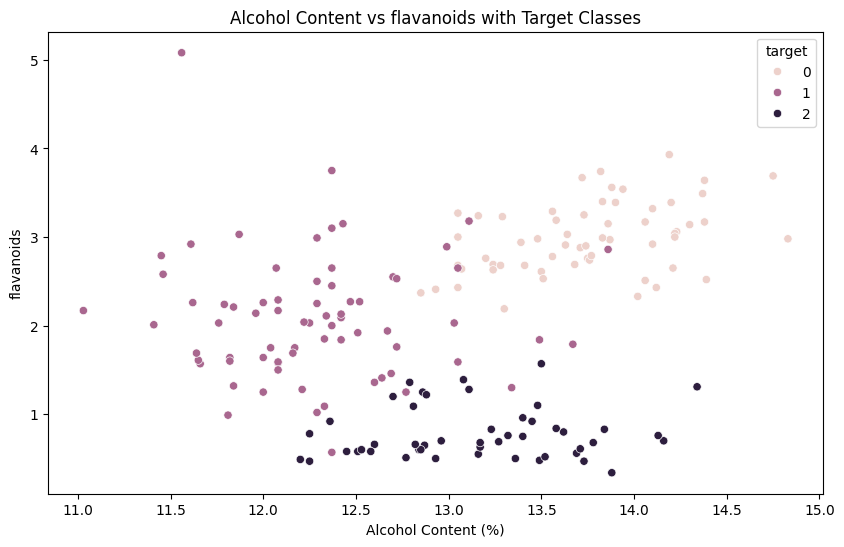

In [19]:
# Scatter plot of 'alcohol' content vs 'flavanoids' with target classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='flavanoids', hue='target', data=wine_df)
plt.title('Alcohol Content vs flavanoids with Target Classes')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('flavanoids')
plt.show()

In [21]:
# T-test to compare 'alcohol' content between different target classes
class_0_alcohol = wine_df.loc[wine_df['target'] == 0, 'alcohol']
class_2_alcohol = wine_df.loc[wine_df['target'] == 2, 'alcohol']
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(class_0_alcohol, class_2_alcohol, alternative='two-sided', equal_var=False)
print("T-test (two-sided) p-value:", p_value)

T-test (two-sided) p-value: 2.671989416705738e-08


In [22]:
# Take a preview
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [23]:
# Data Exploration
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [24]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler

In [25]:
# Split data into features and label 
features = wine_df[data.feature_names].copy()
labels = wine_df["target"].copy()

In [26]:
# Instantiate scaler and fit on features
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [27]:
# Transform features
X_scaled = scaler.transform(features.values)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
# Model Training --- Splitting the dataset
from sklearn.model_selection import train_test_split



In [31]:
# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                                  labels,
                                                                  train_size=.7,
                                                                  random_state=0)



In [32]:
# Building the model
from sklearn.linear_model import LogisticRegression

# Initializing the model 
logistic_regression = LogisticRegression()

# Training the models
logistic_regression.fit(X_train_scaled, y_train)

# Making predictions with the model
log_reg_preds = logistic_regression.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [33]:
from sklearn.svm import SVC

# Initializing the model 
svm = SVC()

# Training the models
svm.fit(X_train_scaled, y_train)

# Making predictions with the model
svm_preds = svm.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the model 
tree = DecisionTreeClassifier(random_state=0)

# Training the models
tree.fit(X_train_scaled, y_train)

# Making predictions with the model
tree_preds = tree.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      0.95      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



In [35]:
# Clustering
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score


In [36]:
# Load the wine dataset
data = load_wine()
X = data.data  # Features
y = data.target  # Target

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
agglo = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=2, min_samples=2)

In [38]:
# Fit and predict
kmeans_labels = kmeans.fit_predict(X_scaled)
agglo_labels = agglo.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [39]:
# Evaluation Metrics
def evaluate_cluster(y_true, y_pred):
    silhouette = silhouette_score(X_scaled, y_pred)
    db_score = davies_bouldin_score(X_scaled, y_pred)
    ch_score = calinski_harabasz_score(X_scaled, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    print(f'Silhouette Score: {silhouette}')
    print(f'Davies-Bouldin Score: {db_score}')
    print(f'Calinski-Harabasz Score: {ch_score}')
    print(f'Adjusted Rand Index: {ari}')


In [40]:
print("KMeans Evaluation:")
evaluate_cluster(y, kmeans_labels)


KMeans Evaluation:
Silhouette Score: 0.2848589191898987
Davies-Bouldin Score: 1.3891879777181648
Calinski-Harabasz Score: 70.94000800315118
Adjusted Rand Index: 0.8974949815093207


In [41]:

print("\nAgglomerative Clustering Evaluation:")
evaluate_cluster(y, agglo_labels)



Agglomerative Clustering Evaluation:
Silhouette Score: 0.2774439826952265
Davies-Bouldin Score: 1.4185919431857326
Calinski-Harabasz Score: 67.6474675044098
Adjusted Rand Index: 0.7899332213582837


In [42]:

print("\nDBSCAN Evaluation:")
evaluate_cluster(y, dbscan_labels)


DBSCAN Evaluation:
Silhouette Score: -0.08807449052298841
Davies-Bouldin Score: 1.9694989120996678
Calinski-Harabasz Score: 7.927298482525937
Adjusted Rand Index: 0.28359749537910145


In [43]:
# Visualizing the clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()


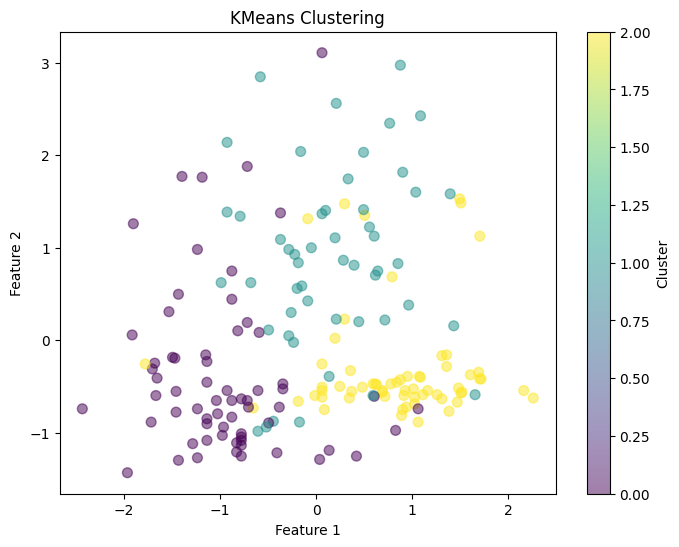

In [44]:
plot_clusters(X_scaled[:, :2], kmeans_labels, 'KMeans Clustering')

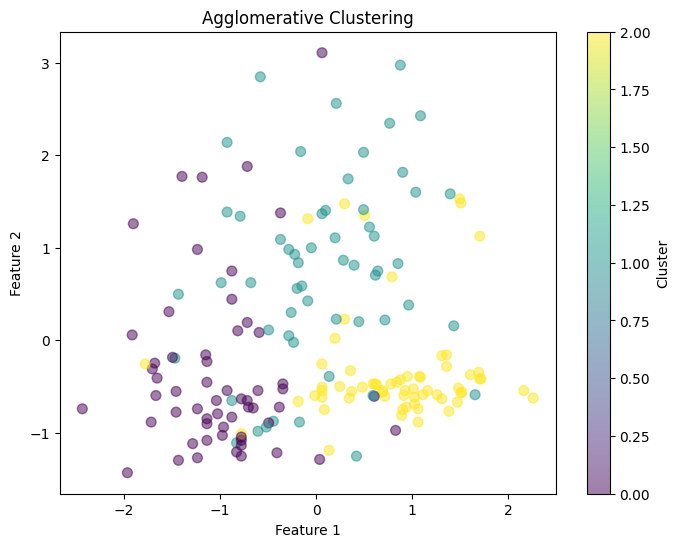

In [45]:

plot_clusters(X_scaled[:, :2], agglo_labels, 'Agglomerative Clustering')

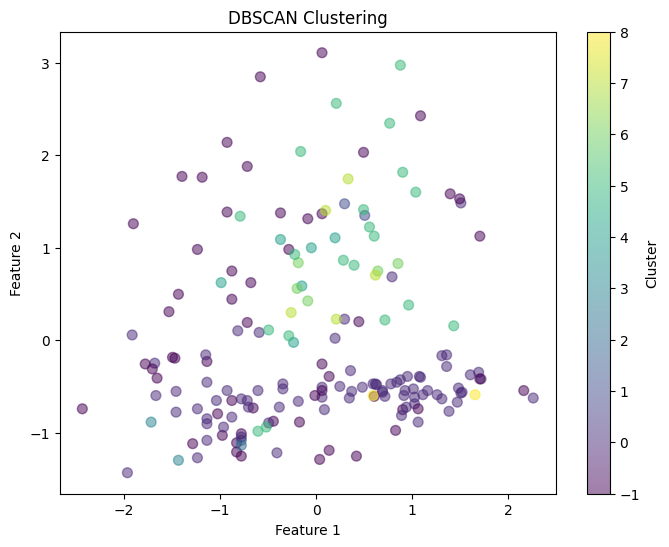

In [46]:

plot_clusters(X_scaled[:, :2], dbscan_labels, 'DBSCAN Clustering')